In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading data
train_dir = 'Teeth_Dataset/Training/'
val_dir = 'Teeth_Dataset/validation/'
test_dir = 'Teeth_Dataset/Testing/'
image_size = (128, 128)
batch_size = 32

##preprocessing(Normalization)
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_dir, target_size=image_size, batch_size=batch_size)
val_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=val_dir, target_size=image_size, batch_size=batch_size)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_dir, target_size=image_size, batch_size=batch_size)



Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [13]:
# Get the number of training samples
num_train_samples = train_batches.n
print(f"Number of training samples: {num_train_samples}")

num_val_samples = val_batches.n
print(f"Number of validation samples: {num_val_samples}")

num_test_samples = test_batches.n
print(f"Number of test samples: {num_test_samples}")

Number of training samples: 3087
Number of validation samples: 1028
Number of test samples: 1028


In [4]:
imgs,label=next(train_batches)

In [5]:
mobile=tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [6]:
mobile.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [8]:
##remove the last layer in model
model=tf.keras.Sequential()
for layer in mobile.layers[:-1]:
    model.add(layer)  ##add all rest layers in the new model

for layer in model.layers:
    layer.trainable=False
##add last layer
model.add(keras.layers.Dense(7,activation='softmax'))
          

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             

 Total params: 4,260,871 (16.25 MB)

 Trainable params: 7,007 (27.37 KB)

 Non-trainable params: 4,253,864 (16.23 MB)

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(
    train_batches,
    validation_data=val_batches,
    epochs=10,  
    steps_per_epoch = train_batches.samples// batch_size,
    validation_steps = val_batches.samples // batch_size,
    verbose=2
)

Epoch 1/10
96/96 - 16s - 170ms/step - accuracy: 0.9656 - loss: 0.1093 - val_accuracy: 0.8252 - val_loss: 0.5471
Epoch 2/10
96/96 - 0s - 2ms/step - accuracy: 0.9062 - loss: 0.2795 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 3/10
96/96 - 17s - 174ms/step - accuracy: 0.9682 - loss: 0.1064 - val_accuracy: 0.8330 - val_loss: 0.5083
Epoch 4/10
96/96 - 0s - 2ms/step - accuracy: 0.9375 - loss: 0.1485 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 5/10
96/96 - 17s - 173ms/step - accuracy: 0.9715 - loss: 0.0907 - val_accuracy: 0.8213 - val_loss: 0.5901
Epoch 6/10
96/96 - 0s - 2ms/step - accuracy: 0.9062 - loss: 0.2577 - val_accuracy: 1.0000 - val_loss: 0.0239
Epoch 7/10
96/96 - 16s - 165ms/step - accuracy: 0.9751 - loss: 0.0888 - val_accuracy: 0.8389 - val_loss: 0.5127
Epoch 8/10
96/96 - 0s - 2ms/step - accuracy: 0.9375 - loss: 0.1253 - val_accuracy: 1.0000 - val_loss: 0.2277
Epoch 9/10
96/96 - 16s - 165ms/step - accuracy: 0.9804 - loss: 0.0763 - val_accuracy: 0.8408 - val_loss: 0.5065
Epoc

In [22]:
# Unfreeze some layers for fine-tuning
for layer in model.layers[-10:]:
    layer.trainable = True


In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(
    train_batches,
    validation_data=val_batches,
    epochs=10,  
    steps_per_epoch = train_batches.samples// batch_size,
    validation_steps = val_batches.samples // batch_size,
    verbose=2
)

Epoch 1/10
96/96 - 46s - 481ms/step - accuracy: 0.7689 - loss: 2.1287 - val_accuracy: 0.4609 - val_loss: 14.9472
Epoch 2/10
96/96 - 1s - 6ms/step - accuracy: 0.7500 - loss: 1.6602 - val_accuracy: 0.2500 - val_loss: 14.9829
Epoch 3/10
96/96 - 32s - 336ms/step - accuracy: 0.9178 - loss: 0.6221 - val_accuracy: 0.6807 - val_loss: 5.9970
Epoch 4/10
96/96 - 0s - 4ms/step - accuracy: 0.9062 - loss: 0.1872 - val_accuracy: 0.0000e+00 - val_loss: 8.3171
Epoch 5/10
96/96 - 32s - 331ms/step - accuracy: 0.9594 - loss: 0.2861 - val_accuracy: 0.7656 - val_loss: 3.6940
Epoch 6/10
96/96 - 0s - 4ms/step - accuracy: 0.9062 - loss: 0.7922 - val_accuracy: 0.7500 - val_loss: 5.0237
Epoch 7/10
96/96 - 32s - 334ms/step - accuracy: 0.9581 - loss: 0.2846 - val_accuracy: 0.9268 - val_loss: 0.7356
Epoch 8/10
96/96 - 0s - 4ms/step - accuracy: 1.0000 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/10
96/96 - 22s - 231ms/step - accuracy: 0.9712 - loss: 0.1895 - val_accuracy: 0.9053 - val_loss: 1

In [26]:
model2 = tf.keras.Sequential()

# Load MobileNet without the top layers
mobile = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(128, 128, 3),
    include_top=False,          
    weights='imagenet'         
)

# Add MobileNet base to the new model
model2.add(mobile)

# Add custom layers
model2.add(keras.layers.GlobalAveragePooling2D())  
model2.add(keras.layers.Dropout(0.5))            
model2.add(keras.layers.Dense(7, activation='softmax'))  

# Freeze the base model layers
for layer in mobile.layers:
    layer.trainable = False

# Optionally, unfreeze some layers for fine-tuning
for layer in model2.layers[-20:]:
    layer.trainable = True

# Compile the model
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model2.summary()


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,236,039 (12.34 MB)

 Trainable params: 7,175 (28.03 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [29]:
# Train the model
model2.fit(
    train_batches,
    validation_data=val_batches,
    epochs=15,
    steps_per_epoch=train_batches.samples // batch_size,
    validation_steps=val_batches.samples // batch_size
)


Epoch 1/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.7664 - loss: 0.6400 - val_accuracy: 0.8545 - val_loss: 0.4632
Epoch 2/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.7500 - loss: 0.5917 - val_accuracy: 0.7500 - val_loss: 0.2646
Epoch 3/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.7926 - loss: 0.5643 - val_accuracy: 0.8613 - val_loss: 0.4352
Epoch 4/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.8125 - loss: 0.5988 - val_accuracy: 1.0000 - val_loss: 0.3075
Epoch 5/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.8030 - loss: 0.5336 - val_accuracy: 0.8779 - val_loss: 0.3928
Epoch 6/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7812 - loss: 0.6383 - val_accuracy: 1.0000 - val_loss: 0.3008
Epoch 7/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.8102 - loss: 0.4979 - val_accuracy: 0.8730 - val_loss: 0.3943
Epoch 8/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.8750 - loss: 0.4738 - val_accuracy

In [30]:
model3 = tf.keras.Sequential()

# Load MobileNet without the top layers
mobile = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(128, 128, 3),
    include_top=False,          
    weights='imagenet'         
)

# Add MobileNet base to the new model
model3.add(mobile)

# Add custom layers
model3.add(keras.layers.GlobalAveragePooling2D())  
model3.add(keras.layers.Dense(128,activation='relu'))   
model3.add(keras.layers.Dropout(0.5))   
model3.add(keras.layers.Dense(64,activation='relu'))   
model3.add(keras.layers.Dense(7, activation='softmax'))  

# Freeze the base model layers
for layer in mobile.layers:
    layer.trainable = False

# Optionally, unfreeze some layers for fine-tuning
for layer in model3.layers[-10:]:
    layer.trainable = True

# Compile the model
model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model3.summary()
# Train the model
model3.fit(
    train_batches,
    validation_data=val_batches,
    epochs=10,
    steps_per_epoch=train_batches.samples // batch_size,
    validation_steps=val_batches.samples // batch_size
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,368,775 (12.85 MB)

 Trainable params: 139,911 (546.53 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 168ms/step - accuracy: 0.3011 - loss: 1.9315 - val_accuracy: 0.6826 - val_loss: 0.9623
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5938 - loss: 1.1282 - val_accuracy: 0.2500 - val_loss: 0.9019
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.6259 - loss: 1.0420 - val_accuracy: 0.7959 - val_loss: 0.6199
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.7812 - loss: 0.5196 - val_accuracy: 0.5000 - val_loss: 1.6806
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.7287 - loss: 0.7331 - val_accuracy: 0.8545 - val_loss: 0.4582
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.7812 - loss: 0.6300 - val_accuracy: 1.0000 - val_loss: 0.2534
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.7895 - loss: 0.5758 - val_accuracy: 0.9033 - val_loss: 0.3250
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.8438 - loss: 0.4025 - val_accuracy: 

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading data
train_dir = 'Teeth_Dataset/Training/'
val_dir = 'Teeth_Dataset/validation/'
test_dir = 'Teeth_Dataset/Testing/'
image_size = (128, 128)
batch_size = 32

##preprocessing(Normalization)
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_dir, target_size=image_size, batch_size=batch_size)
val_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=val_dir, target_size=image_size, batch_size=batch_size)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_dir, target_size=image_size, batch_size=batch_size)


model3 = tf.keras.Sequential()

# Load MobileNet without the top layers
mobile = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(128, 128, 3),
    include_top=False,          
    weights='imagenet'         
)

# Add MobileNet base to the new model
model3.add(mobile)

# Add custom layers
model3.add(keras.layers.GlobalAveragePooling2D())  
model3.add(keras.layers.Dense(128,activation='relu'))   
model3.add(keras.layers.Dropout(0.5))   
model3.add(keras.layers.Dense(64,activation='relu'))   
model3.add(keras.layers.Dense(7, activation='softmax'))  

# Freeze the base model layers
for layer in mobile.layers:
    layer.trainable = False

# Optionally, unfreeze some layers for fine-tuning
for layer in model3.layers[-30:]:
    layer.trainable = True

# Compile the model
model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model3.summary()
# Train the model
model3.fit(
    train_batches,
    validation_data=val_batches,
    epochs=10
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,368,775 (12.85 MB)

 Trainable params: 139,911 (546.53 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - accuracy: 0.2940 - loss: 1.9034 - val_accuracy: 0.6625 - val_loss: 1.0182
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.6134 - loss: 1.1024 - val_accuracy: 0.7675 - val_loss: 0.6824
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.7344 - loss: 0.7549 - val_accuracy: 0.8434 - val_loss: 0.4683
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.8077 - loss: 0.5489 - val_accuracy: 0.8658 - val_loss: 0.3877
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.8375 - loss: 0.4371 - val_accuracy: 0.8901 - val_loss: 0.3263
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.8838 - loss: 0.3322 - val_accuracy: 0.9163 - val_loss: 0.2660
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.9018 - loss: 0.2798 - val_accuracy: 0.9407 - val_loss: 0.2019
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.9211 - loss: 0.2411 - val_accu

In [5]:
# Save the model 
model3.save('MobileNet_teeth_model_finetuned.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = model3.evaluate(test_batches)
print(f"Test Accuracy: {test_accuracy:.2f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.9397 - loss: 0.1535
Test Accuracy: 0.94


In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading data
train_dir = 'Teeth_Dataset/Training/'
val_dir = 'Teeth_Dataset/validation/'
test_dir = 'Teeth_Dataset/Testing/'
image_size = (128, 128)
batch_size = 32

##preprocessing(Normalization)
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_dir, target_size=image_size, batch_size=batch_size)
val_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=val_dir, target_size=image_size, batch_size=batch_size)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_dir, target_size=image_size, batch_size=batch_size)


model4 = tf.keras.Sequential()

# Load MobileNet without the top layers
mobile = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(128, 128, 3),
    include_top=False,          
    weights='imagenet'         
)

# Add MobileNet base to the new model
model4.add(mobile)

# Add custom layers
model4.add(keras.layers.GlobalAveragePooling2D())  
model4.add(keras.layers.Dense(128,activation='relu'))   
model4.add(keras.layers.Dropout(0.5))   
model4.add(keras.layers.Dense(64,activation='relu'))   
model4.add(keras.layers.Dense(7, activation='softmax'))  

# Freeze the base model layers
for layer in mobile.layers:
    layer.trainable = False

# Optionally, unfreeze some layers for fine-tuning
for layer in model4.layers[-30:]:
    layer.trainable = True

# Compile the model
model4.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model4.summary()
# Train the model
history=model4.fit(
    train_batches,
    validation_data=val_batches,
    epochs=20
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,368,775 (12.85 MB)

 Trainable params: 139,911 (546.53 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.3069 - loss: 1.8538 - val_accuracy: 0.6654 - val_loss: 0.9840
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.6170 - loss: 1.0465 - val_accuracy: 0.7558 - val_loss: 0.7087
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.7182 - loss: 0.8012 - val_accuracy: 0.8298 - val_loss: 0.4919
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.7882 - loss: 0.5803 - val_accuracy: 0.8940 - val_loss: 0.3488
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.8532 - loss: 0.4262 - val_accuracy: 0.9056 - val_loss: 0.2849
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.8761 - loss: 0.3471 - val_accuracy: 0.9348 - val_loss: 0.2258
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.9003 - loss: 0.2836 - val_accuracy: 0.9455 - val_loss: 0.1939
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.9186 - loss: 0.2286 - val_accu

In [14]:
model4.save('MobileNet1_teeth_model_finetuned.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = model4.evaluate(test_batches)
print(f"Test Accuracy: {test_accuracy:.2f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.9689 - loss: 0.0916
Test Accuracy: 0.97


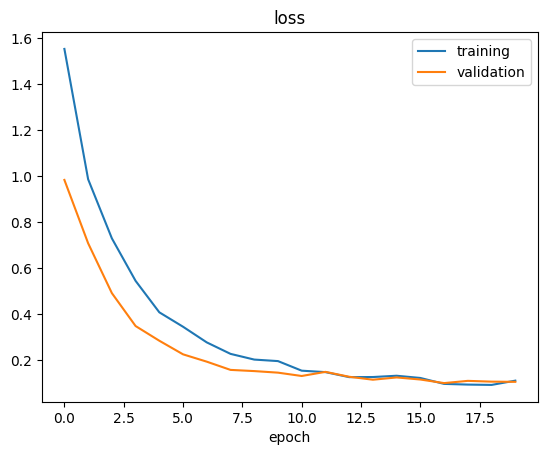

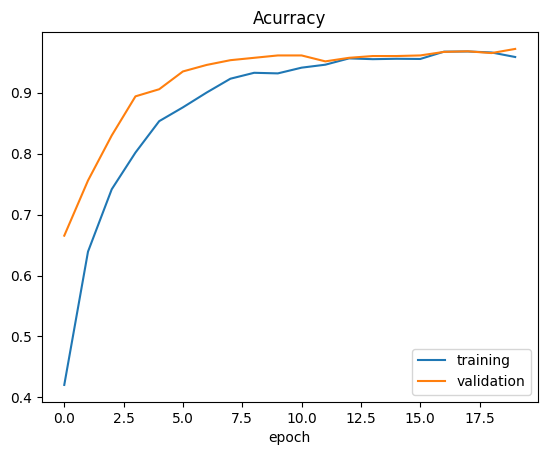

In [15]:
###visualizing Model Results
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
## plot Training and validation accuracy )
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()